In [4]:
import pandas as pd
import geopandas as gpd

In [5]:
plottable = pd.read_csv('county_racial_representation_table.csv')

In [6]:
plottable["Dif"] = plottable["black_perc_sys"] - plottable["black_pop_perc"]

<AxesSubplot:>

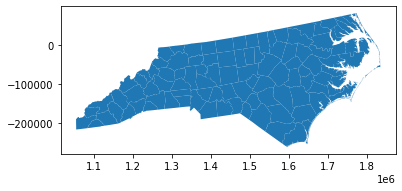

In [7]:
shape = gpd.read_file("C:/Users/Chuhan/Desktop/nhgis0008_shapefile_tl2021_us_county_2021/US_county_2021.shp")
nc = shape[shape['STATEFP']=='37']
nc.plot()

In [8]:
tmp = plottable[["Dif","COUNTY"]]

<AxesSubplot:>

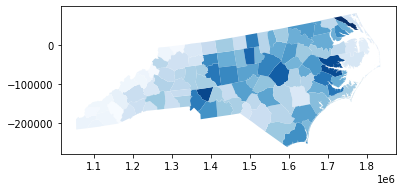

In [9]:
merged = pd.merge(nc,tmp, left_on = 'NAMELSAD', right_on = 'COUNTY', how = 'inner')
merged.plot("Dif",cmap='Blues')

In [10]:
finaldf = plottable.merge(nc, how='left',left_on='COUNTY', right_on='NAMELSAD')

Text(0.5, 1.0, 'Percentage of Over-Aggravated Sentencing')

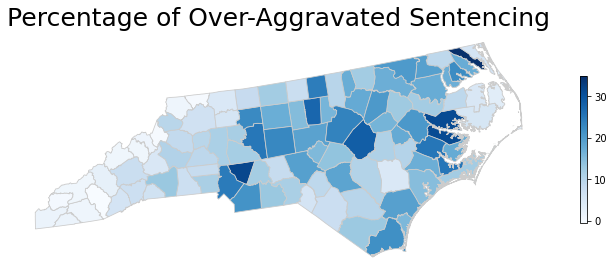

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 9))
merged.plot(column='Dif', cmap='Blues',linewidth=0.8, ax=ax, edgecolor='0.8',legend=True,legend_kwds={'shrink': 0.3})
ax.axis('off')
ax.set_title('Percentage of Over-Aggravated Sentencing', fontdict={'fontsize': '25', 'fontweight': '3'})

In [12]:
plottable['cat'] = 1

In [13]:
plottable.loc[plottable['Dif'] < 0, 'cat'] = '<0'
plottable.loc[plottable['Dif'] > 0, 'cat'] = '0-5'
plottable.loc[plottable['Dif'] > 5, 'cat'] = '5-10'
plottable.loc[plottable['Dif'] > 10, 'cat'] = '10-15'
plottable.loc[plottable['Dif'] > 15, 'cat'] = '15-20'
plottable.loc[plottable['Dif'] > 20, 'cat'] = '20-25'
plottable.loc[plottable['Dif'] > 25, 'cat'] = '25-30'
plottable.loc[plottable['Dif'] > 30, 'cat'] = '30-35'

<AxesSubplot:>

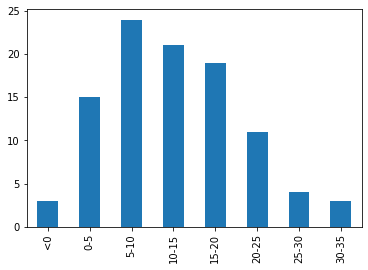

In [14]:
plottable['cat'].value_counts().reindex(['<0','0-5','5-10','10-15','15-20','20-25','25-30','30-35']).plot(kind='bar')

In [15]:
plottable["Dif"] = plottable["black_perc_sys"] / plottable["black_pop_perc"]

In [16]:
plottable['cat'] = 1

In [17]:
plottable.loc[plottable['Dif'] < 1, 'cat'] = '0-1'
plottable.loc[plottable['Dif'] > 1, 'cat'] = '1-2'
plottable.loc[plottable['Dif'] > 2, 'cat'] = '2-3'
plottable.loc[plottable['Dif'] > 3, 'cat'] = '3-4'
plottable.loc[plottable['Dif'] > 4, 'cat'] = '4-5'
plottable.loc[plottable['Dif'] > 5, 'cat'] = '>5'

<AxesSubplot:>

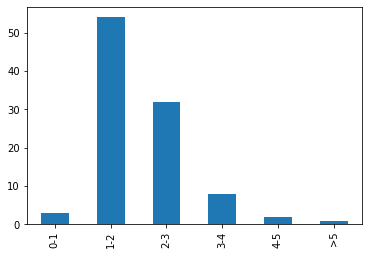

In [18]:
plottable['cat'].value_counts().reindex(['0-1','1-2','2-3','3-4','4-5','>5']).plot(kind='bar')